In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## Load the data

In [2]:
df_blue_waters_posix_combined = pd.read_csv("../data/blue_waters_posix.csv")

In [3]:
len(df_blue_waters_posix_combined)

851195

In [4]:
df_blue_waters_posix_combined.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,jobid,run_time,log_ver,start_time,end_time,lib_ver,hints,exe,lustre,bandwidth
0,49152,-24576,-24576,0,0,0,24576,0,0,0,...,7963460,47.0,3.1,2017-12-22 12:30:35,2017-12-22 12:31:21,3.1.3,romio_no_indep_rw=true;cb_nodes=4,/u/system/bwjenkins/mdtest-jenkins/mdtest/mdte...,0,0.000000
1,1747,-130,-130,86885,35912,85705,3365,0,0,0,...,7961326,19.0,3.1,2017-12-23 00:42:24,2017-12-23 00:42:42,3.1.3,romio_no_indep_rw=true;cb_nodes=4,enzo.exe -d -r DD0601/DD0601,1,255.557572
2,1747,-130,-130,86885,35912,85705,3365,0,0,0,...,7961326,19.0,3.1,2017-12-23 02:12:34,2017-12-23 02:12:52,3.1.3,romio_no_indep_rw=true;cb_nodes=4,enzo.exe -d -r DD0601/DD0601,1,226.638510
3,1747,-130,-130,86885,35912,85705,3365,0,0,0,...,7961326,19.0,3.1,2017-12-23 02:27:39,2017-12-23 02:27:57,3.1.3,romio_no_indep_rw=true;cb_nodes=4,enzo.exe -d -r DD0601/DD0601,1,180.999088
4,1747,-130,-130,86885,35912,85705,3365,0,0,0,...,7961326,19.0,3.1,2017-12-23 01:09:09,2017-12-23 01:09:27,3.1.3,romio_no_indep_rw=true;cb_nodes=4,enzo.exe -d -r DD0601/DD0601,1,187.159073


### Drop the irrelevant columns

In [5]:
df_blue_waters_posix_filtered = df_blue_waters_posix_combined.drop(['uid', 'jobid', 'hints', 'start_time', 'end_time', 'lib_ver'], axis=1)

In [6]:
df_blue_waters_posix_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851195 entries, 0 to 851194
Columns: 110 entries, POSIX_OPENS to bandwidth
dtypes: float64(13), int64(96), object(1)
memory usage: 714.4+ MB


### Remove columns that have only 0s in them

In [7]:
df_blue_waters_posix_filtered.loc[:, (df_blue_waters_posix_filtered == 0).all()]

,POSIX_FDSYNCS,POSIX_RENAMED_FROM,POSIX_F_VARIANCE_RANK_TIME,POSIX_F_VARIANCE_RANK_BYTES,start_time_nsec,end_time_nsec
0,0,0,0.0,0.0,0,0
1,0,0,0.0,0.0,0,0
2,0,0,0.0,0.0,0,0
3,0,0,0.0,0.0,0,0
4,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...
851190,0,0,0.0,0.0,0,0
851191,0,0,0.0,0.0,0,0
851192,0,0,0.0,0.0,0,0
851193,0,0,0.0,0.0,0,0


In [8]:
df_blue_waters_posix_filtered = df_blue_waters_posix_filtered.loc[:, (df_blue_waters_posix_filtered != 0).any()]

### Look for outliers in the data

In [9]:
df_blue_waters_posix_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,851195.0,2.635885e+04,8.738680e+05,0.000000e+00,194.000000,4932.000000,1.573750e+04,5.531094e+08
POSIX_FILENOS,851195.0,-1.621601e+03,2.852594e+04,-3.933124e+06,-977.000000,-288.000000,-2.000000e+01,-1.000000e+00
POSIX_DUPS,851195.0,-1.621601e+03,2.852594e+04,-3.933124e+06,-977.000000,-288.000000,-2.000000e+01,-1.000000e+00
POSIX_READS,851195.0,2.370821e+06,7.720144e+07,0.000000e+00,12181.000000,218344.000000,1.531313e+06,2.237846e+10
POSIX_WRITES,851195.0,4.372616e+06,7.275607e+07,0.000000e+00,7567.000000,254537.000000,2.970618e+06,1.920921e+10
...,...,...,...,...,...,...,...,...
nprocs,851195.0,1.631877e+02,2.304646e+03,1.000000e+00,16.000000,48.000000,6.400000e+01,4.298240e+05
run_time,851195.0,1.288807e+04,2.611300e+04,1.000000e+00,177.000000,927.000000,7.906000e+03,5.529890e+05
log_ver,851195.0,3.100000e+00,8.881789e-16,3.100000e+00,3.100000,3.100000,3.100000e+00,3.100000e+00
lustre,851195.0,9.888580e-01,1.049660e-01,0.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00


We can see that the minimum values are **negative** for:
- POSIX_F_FASTEST_RANK_TIME
- POSIX_F_SLOWEST_RANK_TIME
- POSIX_F_META_TIME
- POSIX_TOTAL_TIME (probably because of the above)

These do not really make sense and are caused by the improper job closure or hardware faults, so should be fitlered out.

In [10]:
df_blue_waters_posix_filtered.select_dtypes(include='number').columns[(df_blue_waters_posix_filtered.select_dtypes(include='number') < 0).any()]

Index(['POSIX_FILENOS', 'POSIX_DUPS', 'POSIX_MMAPS', 'POSIX_RENAME_SOURCES',
       'POSIX_RENAME_TARGETS', 'rank', 'POSIX_F_META_TIME', 'POSIX_TOTAL_TIME',
       'POSIX_F_FASTEST_RANK_TIME', 'POSIX_F_SLOWEST_RANK_TIME', 'bandwidth'],
      dtype='object')

In [11]:
df_posix_negative_outliers = df_blue_waters_posix_filtered.loc[(df_blue_waters_posix_filtered.POSIX_F_FASTEST_RANK_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_F_SLOWEST_RANK_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_FILENOS < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_DUPS < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_MMAPS < 0)]
df_posix_negative_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,start_time_sec,end_time_sec,nprocs,run_time,log_ver,exe,lustre,bandwidth
0,49152,-24576,-24576,0,0,0,24576,0,0,-24576,...,0.0,0.000000,1513942235,1513942281,24,47.0,3.1,/u/system/bwjenkins/mdtest-jenkins/mdtest/mdte...,0,0.000000
1,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.135492,1513986144,1513986162,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,255.557572
2,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.162338,1513991554,1513991572,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,226.638510
3,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.193178,1513992459,1513992477,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,180.999088
4,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.205942,1513987749,1513987767,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,187.159073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851190,8709,-288,-288,1398193,6331987,2021535,28430,0,0,-288,...,0.0,80.506971,1531513254,1531513957,256,704.0,3.1,CCTM_v52_Linux2_x86_64intel,1,259.932043
851191,8709,-288,-288,1393841,6331677,2015391,28430,0,0,-288,...,0.0,63.564875,1531508939,1531509581,256,643.0,3.1,CCTM_v52_Linux2_x86_64intel,1,356.765856
851192,8709,-288,-288,1398193,6327571,2013855,28430,0,0,-288,...,0.0,59.515109,1531556071,1531556744,256,674.0,3.1,CCTM_v52_Linux2_x86_64intel,1,358.838439
851193,8709,-288,-288,1396913,6329542,2010527,28430,0,0,-288,...,0.0,112.244880,1531511947,1531512674,256,728.0,3.1,CCTM_v52_Linux2_x86_64intel,1,307.633323


In [12]:
df_blue_waters_posix_filtered_no_outliers = df_blue_waters_posix_filtered.loc[(df_blue_waters_posix_filtered.POSIX_F_FASTEST_RANK_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_F_SLOWEST_RANK_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_F_META_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_TOTAL_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.bandwidth >= 0)]
df_blue_waters_posix_filtered_no_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,start_time_sec,end_time_sec,nprocs,run_time,log_ver,exe,lustre,bandwidth
0,49152,-24576,-24576,0,0,0,24576,0,0,-24576,...,0.0,0.000000,1513942235,1513942281,24,47.0,3.1,/u/system/bwjenkins/mdtest-jenkins/mdtest/mdte...,0,0.000000
1,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.135492,1513986144,1513986162,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,255.557572
2,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.162338,1513991554,1513991572,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,226.638510
3,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.193178,1513992459,1513992477,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,180.999088
4,1747,-130,-130,86885,35912,85705,3365,0,0,-130,...,0.0,0.205942,1513987749,1513987767,128,19.0,3.1,enzo.exe -d -r DD0601/DD0601,1,187.159073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851190,8709,-288,-288,1398193,6331987,2021535,28430,0,0,-288,...,0.0,80.506971,1531513254,1531513957,256,704.0,3.1,CCTM_v52_Linux2_x86_64intel,1,259.932043
851191,8709,-288,-288,1393841,6331677,2015391,28430,0,0,-288,...,0.0,63.564875,1531508939,1531509581,256,643.0,3.1,CCTM_v52_Linux2_x86_64intel,1,356.765856
851192,8709,-288,-288,1398193,6327571,2013855,28430,0,0,-288,...,0.0,59.515109,1531556071,1531556744,256,674.0,3.1,CCTM_v52_Linux2_x86_64intel,1,358.838439
851193,8709,-288,-288,1396913,6329542,2010527,28430,0,0,-288,...,0.0,112.244880,1531511947,1531512674,256,728.0,3.1,CCTM_v52_Linux2_x86_64intel,1,307.633323


### Look at the boxplot of bandwidth

<Axes: title={'center': 'Boxplot for bandwidth'}, xlabel='bandwidth'>

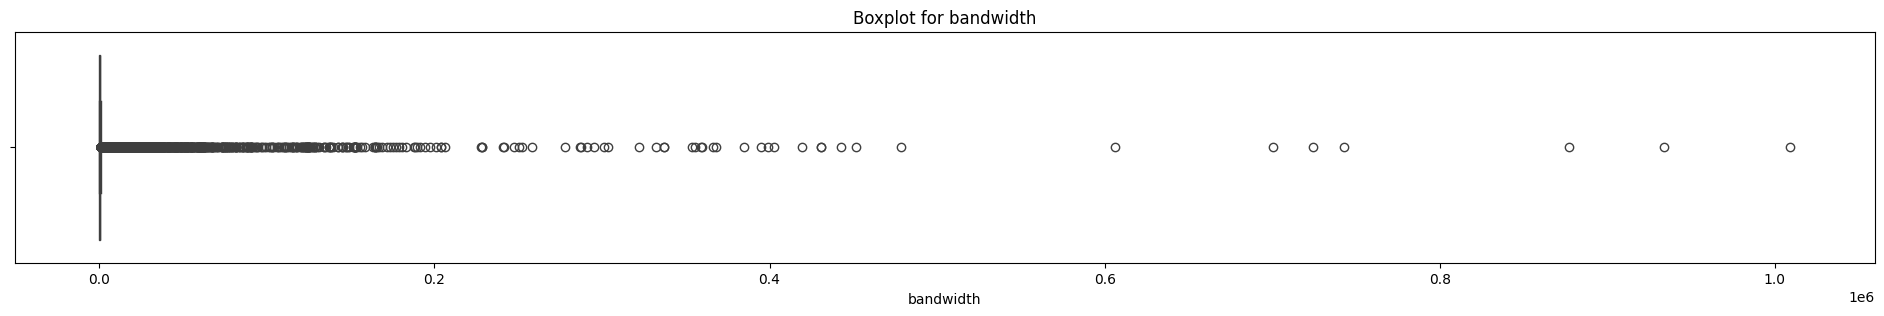

In [13]:
fig = plt.figure(1, figsize=(24, 3))
plt.title("Boxplot for bandwidth")
sns.boxplot(x=df_blue_waters_posix_filtered_no_outliers.bandwidth)

In [14]:
bandwidth_q1 = df_blue_waters_posix_filtered_no_outliers.bandwidth.quantile(0.25)
bandwidth_q3 = df_blue_waters_posix_filtered_no_outliers.bandwidth.quantile(0.75)
bandwidth_iqr = bandwidth_q3 - bandwidth_q1
bandwidth_iqr

np.float64(321.5014428607225)

In [15]:
filter = (df_blue_waters_posix_filtered_no_outliers.bandwidth >= bandwidth_q1 - 1.5 * bandwidth_iqr) & (df_blue_waters_posix_filtered_no_outliers.bandwidth <= bandwidth_q3 + 1.5 * bandwidth_iqr)

bandwidth_outliers = df_blue_waters_posix_filtered_no_outliers.loc[(filter)==False]
bandwidth_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,start_time_sec,end_time_sec,nprocs,run_time,log_ver,exe,lustre,bandwidth
197,44615,-855,-855,3208457,1422257,3066536,228631,0,1,-855,...,0.00000,0.752182,1513912149,1513946940,48,34792.0,3.1,./SpEC,1,1234.964748
302,39602,-618,-618,1272142,141953,712944,94458,0,1,-618,...,0.00000,1.215151,1513910934,1513912106,48,1173.0,3.1,./SpEC,1,936.358976
372,6585,-2481,-2481,257097,200817,99478,10458,0,0,-2481,...,0.00000,3.362839,1556973889,1557024947,80,51059.0,3.1,pw.x -npool 5 -in TeCuO3.in,1,1007.534643
385,5302,-2400,-2400,260942,196025,100822,8929,0,0,-2400,...,0.00000,1.448483,1556954017,1556969742,80,15726.0,3.1,pw.x -npool 5 -in SeCuO3.in,1,2000.266132
411,7719,-2175,-2175,261270,14759,6822,11752,0,0,-2175,...,0.00000,0.931632,1556925041,1557007447,80,82407.0,3.1,pw.x -npool 5 -in SeCuO3.in,1,2032.163718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851143,1976,-1005,-1005,115564,113129,53068,3332,0,0,-1005,...,0.00000,0.771366,1531589227,1531626589,64,37363.0,3.1,pw.x -npool 4 -in Tp-La2CuO4.in,1,1328.213388
851149,255270,-2065,-2065,11349940,2574560,5424225,1177368,0,1,-2065,...,0.00000,9.528865,1531541443,1531593674,32,52232.0,3.1,./SpEC,1,1374.725941
851154,26378,-936,-936,1420437,261311,702790,120149,0,1,-936,...,0.00000,0.233347,1531609052,1531615255,32,6204.0,3.1,./SpEC,1,3130.290761
851163,207050,-187,-187,357278,0,862,202,0,0,-187,...,0.00008,13.012391,1531628148,1531629517,1024,1370.0,3.1,./nek5000,1,2329.369304


In [16]:
df_blue_waters_posix_filtered_no_outliers = df_blue_waters_posix_filtered_no_outliers.loc[filter]

<Axes: xlabel='bandwidth'>

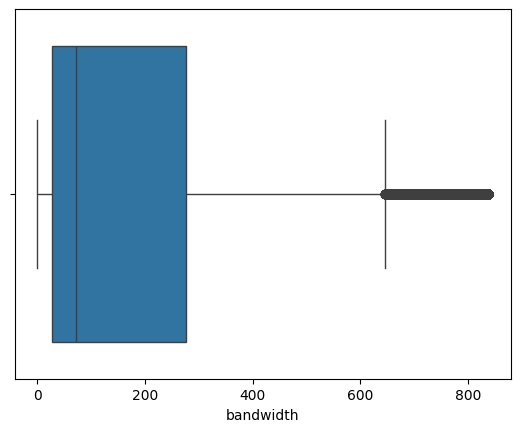

In [17]:
sns.boxplot(x=df_blue_waters_posix_filtered_no_outliers.bandwidth)

In [18]:
df_blue_waters_posix_filtered_no_outliers.to_csv(r"../data/blue_waters_posix_all_no_outliers.csv", index=False)